In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report,
    ConfusionMatrixDisplay
)

In [2]:
train_df = pd.read_csv("scaled_train_data.csv")
test_df = pd.read_csv("scaled_test_data.csv")

X_train = train_df.drop("completed_course", axis=1)
y_train = train_df["completed_course"]

X_test = test_df.drop("completed_course", axis=1)
y_test = test_df["completed_course"]

In [3]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [4]:
# Create and train XGBoost model
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb.predict(X_test)

In [5]:
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)

----- Logistic Regression -----
Accuracy: 0.81791
Precision: 0.692412539754657
Recall: 0.48797278367020214
F1 Score: 0.5724884370671237

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88     75015
           1       0.69      0.49      0.57     24985

    accuracy                           0.82    100000
   macro avg       0.77      0.71      0.73    100000
weighted avg       0.81      0.82      0.81    100000



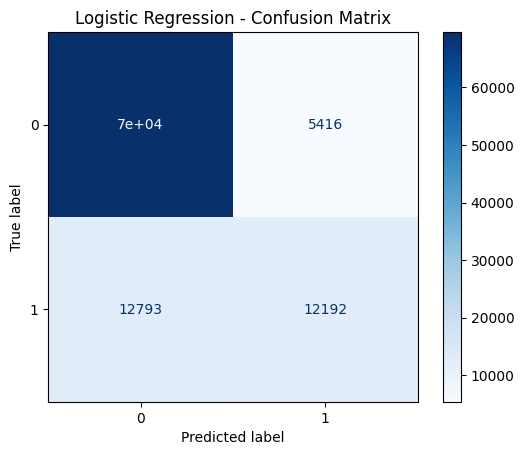

----- Random Forest -----
Accuracy: 0.86486
Precision: 0.9451299961195189
Recall: 0.4874124474684811
F1 Score: 0.643147610245577

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92     75015
           1       0.95      0.49      0.64     24985

    accuracy                           0.86    100000
   macro avg       0.90      0.74      0.78    100000
weighted avg       0.88      0.86      0.85    100000



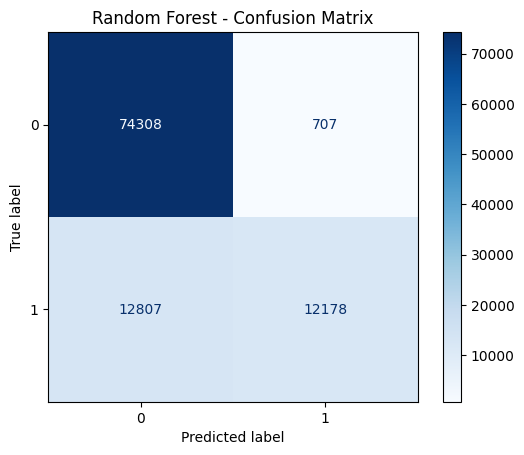

----- XGBoost -----
Accuracy: 0.86872
Precision: 0.9919508754460211
Recall: 0.4784470682409446
F1 Score: 0.6455340749540988

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92     75015
           1       0.99      0.48      0.65     24985

    accuracy                           0.87    100000
   macro avg       0.92      0.74      0.78    100000
weighted avg       0.89      0.87      0.85    100000



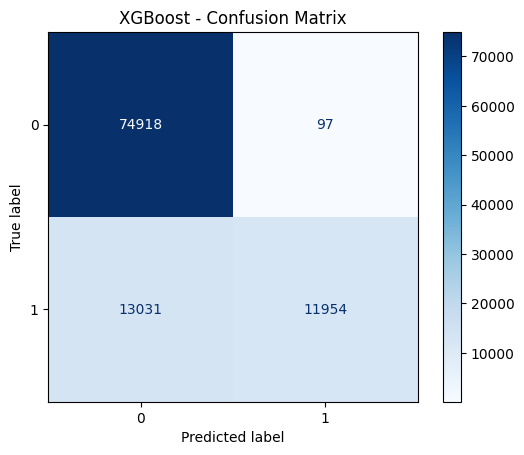

In [10]:
import matplotlib.pyplot as plt
def evaluate_model(name, y_true, y_pred):
    print(f"----- {name} -----")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap="Blues")
    disp.ax_.set_title(f"{name} - Confusion Matrix")
    plt.show()
evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)